<ipython-input-4-b764840784fe>:8: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  kic_lc = lk.search_lightcurvefile(kic_target, quarter=kic_quarter).download().PDCSAP_FLUX
/usr/local/lib/python3.10/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-4-b764840784fe>:8: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  kic_lc = lk.search_lightcurvefile(kic_target, quarter=kic_quarter).download().PDCSAP_FLUX
<ipython-input-4-b764840784fe>:15: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightc

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

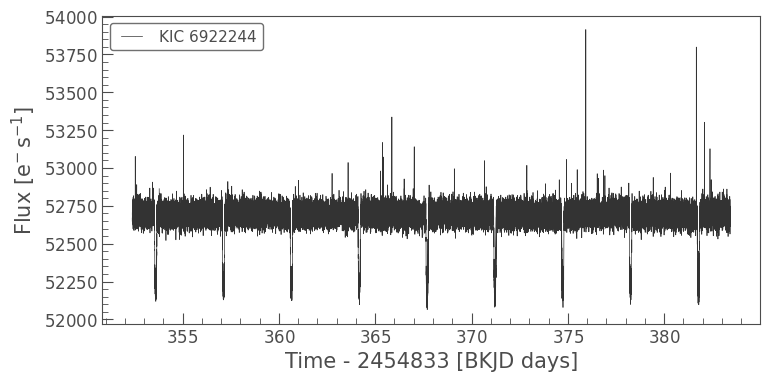

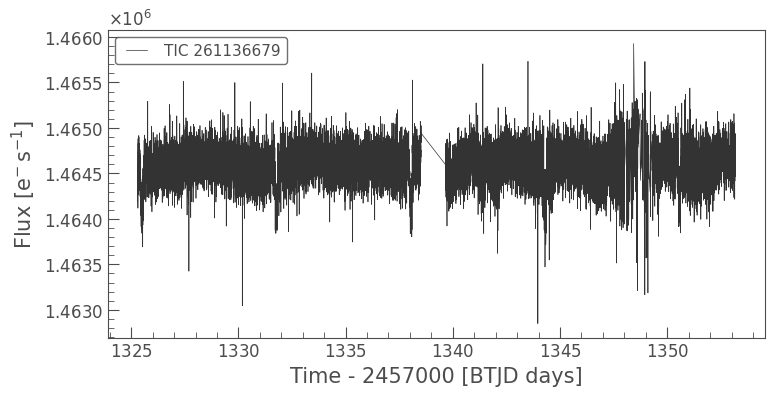

In [4]:
import lightkurve as lk

kic_target = "KIC 6922244"
kic_quarter = 4

kic_lc = lk.search_lightcurvefile(kic_target, quarter=kic_quarter).download().PDCSAP_FLUX

pi_mensae_target = "Pi Mensae"
pi_mensae_sector = 1

pi_mensae_lc = lk.search_lightcurvefile(pi_mensae_target, sector=pi_mensae_sector).download().PDCSAP_FLUX

kic_lc.plot(title=f"Light Curve for {kic_target} (Quarter {kic_quarter})")
pi_mensae_lc.plot(title=f"Light Curve for {pi_mensae_target} (Sector {pi_mensae_sector})")



/usr/local/lib/python3.10/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

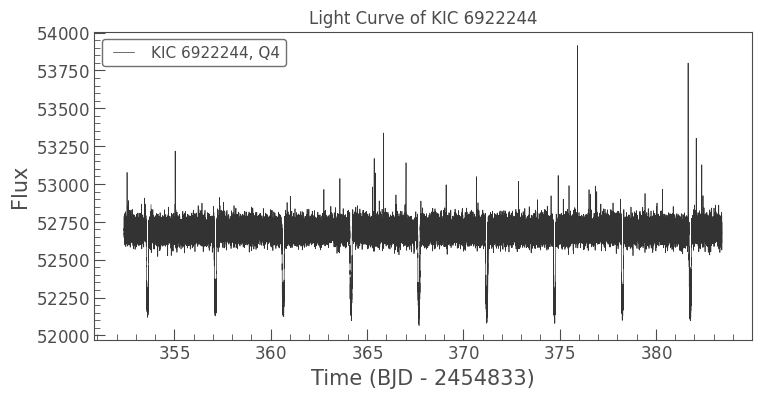

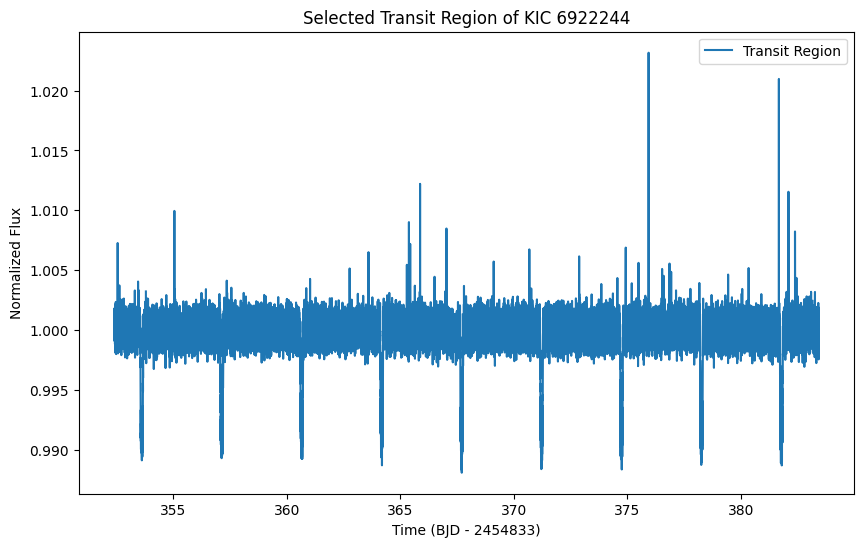

Estimated radius ratio (R_planet / R_star) = 0.109


In [20]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

star1 = lk.search_lightcurve('KIC 6922244', mission='Kepler', quarter=4).download()

plt.figure(figsize=(10,6))
star1.plot(label="KIC 6922244, Q4")
plt.xlabel('Time (BJD - 2454833)')
plt.ylabel('Flux')
plt.title('Light Curve of KIC 6922244')
plt.show()

star1_normalized = star1.normalize()

time_values = star1_normalized.time.value
start_time = 200
end_time = 500

time_window = (time_values > start_time) & (time_values < end_time)
transit_flux = star1_normalized.flux[time_window]
transit_time = time_values[time_window]

plt.figure(figsize=(10,6))
plt.plot(transit_time, transit_flux, label="Transit Region")
plt.xlabel('Time (BJD - 2454833)')
plt.ylabel('Normalized Flux')
plt.title('Selected Transit Region of KIC 6922244')
plt.legend()
plt.show()

if len(transit_flux) > 0:
    transit_depth = 1 - np.min(transit_flux)

    radius_ratio = np.sqrt(transit_depth)

    print(f"Estimated radius ratio (R_planet / R_star) = {radius_ratio:.3f}")
else:
    print("No data points in the selected time window. Adjust the time window for the transit.")


/usr/local/lib/python3.10/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

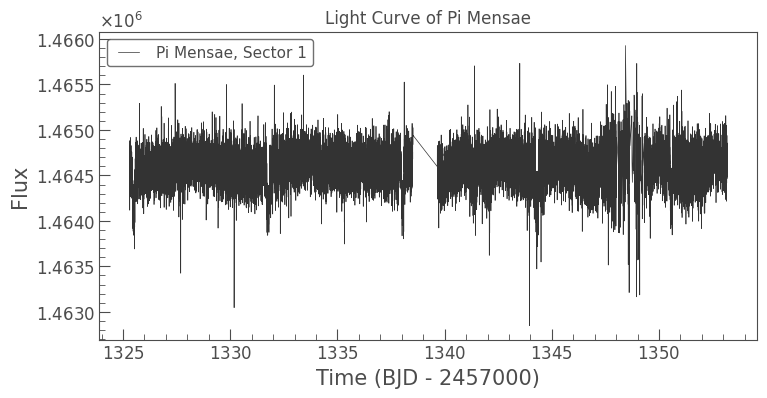

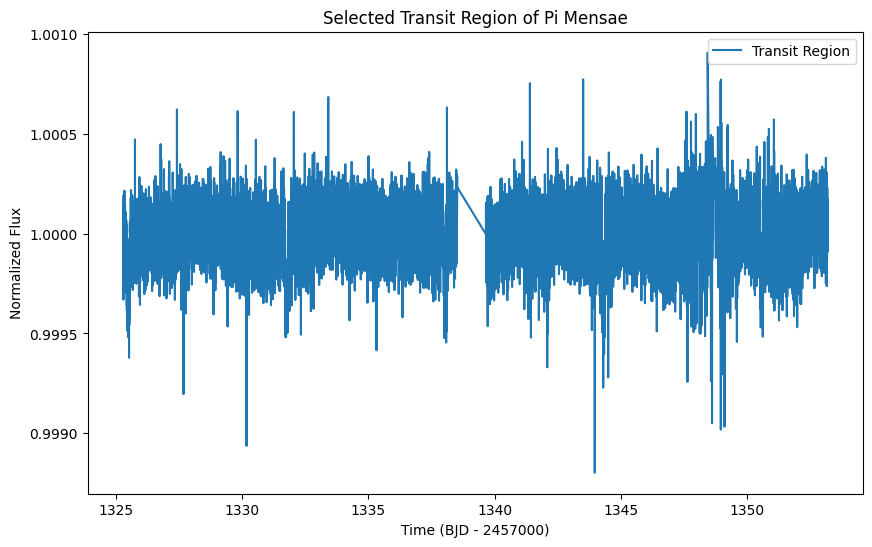

Estimated radius ratio (R_planet / R_star) = 0.035


In [22]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

star2 = lk.search_lightcurve('Pi Mensae', mission='TESS', sector=1).download()

plt.figure(figsize=(10,6))
star2.plot(label="Pi Mensae, Sector 1")
plt.xlabel('Time (BJD - 2457000)')
plt.ylabel('Flux')
plt.title('Light Curve of Pi Mensae')
plt.show()

star2_normalized = star2.normalize()

time_values = star2_normalized.time.value

start_time = 1300
end_time = 1500

time_window = (time_values > start_time) & (time_values < end_time)
transit_flux = star2_normalized.flux[time_window]
transit_time = time_values[time_window]

plt.figure(figsize=(10,6))
plt.plot(transit_time, transit_flux, label="Transit Region")
plt.xlabel('Time (BJD - 2457000)')
plt.ylabel('Normalized Flux')
plt.title('Selected Transit Region of Pi Mensae')
plt.legend()
plt.show()

if len(transit_flux) > 0:
    transit_depth = 1 - np.min(transit_flux)

    radius_ratio = np.sqrt(transit_depth)


    print(f"Estimated radius ratio (R_planet / R_star) = {radius_ratio:.3f}")
else:
    print("No data points in the selected time window. Adjust the time window for the transit.")


/usr/local/lib/python3.10/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


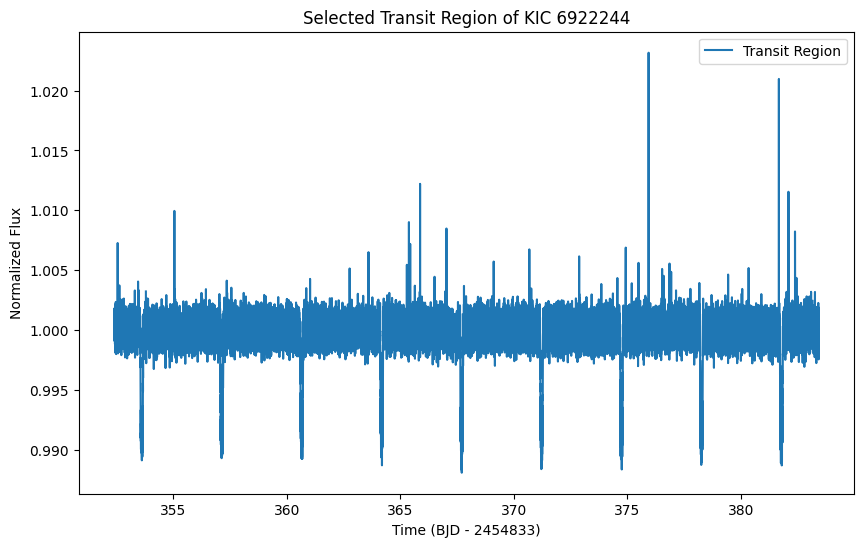

Transit duration = 31.058 days


In [23]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

star1 = lk.search_lightcurve('KIC 6922244', mission='Kepler', quarter=4).download()

star1_normalized = star1.normalize()

time_values = star1_normalized.time.value

start_time = 200
end_time = 500

time_window = (time_values > start_time) & (time_values < end_time)
transit_flux = star1_normalized.flux[time_window]
transit_time = time_values[time_window]

plt.figure(figsize=(10,6))
plt.plot(transit_time, transit_flux, label="Transit Region")
plt.xlabel('Time (BJD - 2454833)')
plt.ylabel('Normalized Flux')
plt.title('Selected Transit Region of KIC 6922244')
plt.legend()
plt.show()

if len(transit_flux) > 0:
    transit_start_time = np.min(transit_time)
    transit_end_time = np.max(transit_time)

    transit_duration = transit_end_time - transit_start_time
    print(f"Transit duration = {transit_duration:.3f} days")
else:
    print("No data points in the selected time window. Adjust the time window for the transit.")


/usr/local/lib/python3.10/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


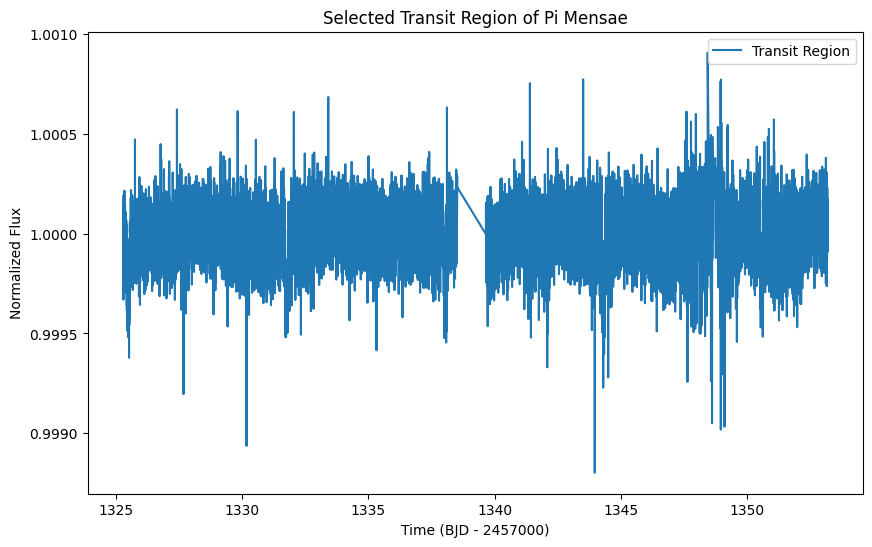

Transit duration = 27.880 days


In [24]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

star2 = lk.search_lightcurve('Pi Mensae', mission='TESS', sector=1).download()

star2_normalized = star2.normalize()

time_values = star2_normalized.time.value

start_time = 1300
end_time = 1500

time_window = (time_values > start_time) & (time_values < end_time)
transit_flux = star2_normalized.flux[time_window]
transit_time = time_values[time_window]

plt.figure(figsize=(10,6))
plt.plot(transit_time, transit_flux, label="Transit Region")
plt.xlabel('Time (BJD - 2457000)')
plt.ylabel('Normalized Flux')
plt.title('Selected Transit Region of Pi Mensae')
plt.legend()
plt.show()

if len(transit_flux) > 0:
    transit_start_time = np.min(transit_time)
    transit_end_time = np.max(transit_time)

    transit_duration = transit_end_time - transit_start_time
    print(f"Transit duration = {transit_duration:.3f} days")
else:
    print("No data points in the selected time window. Adjust the time window for the transit.")
